<img src="../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px\" align="left">

## Purity Randomized Benchmarking


- Last Updated: June 24, 2019
- Requires: qiskit-terra 0.8, qiskit-ignis 0.1.1, qiskit-aer 0.2

## Introduction

**Purity Randomized Benchmarking** is a variant of the Randomized Benchmarking (RB) method, which quantifies how *coherent* the errors are. The protocol executes the RB sequneces containing of Clifford gates, and then calculates the *purity* $Tr(\rho^2)$, and fits the purity result to an exponentially decaying curve.

This notebook gives an example for how to use the ``ignis.verification.randomized_benchmarking`` module in order to perform purity RB.

In [21]:
#Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

import qiskit.ignis.verification.randomized_benchmarking as rb

#Import Qiskit classes classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, coherent_unitary_error

## Select the Parameters of the Purity RB Run

First, wee need to choose the regular RB parameters:

- **nseeds**: The number of seeds. For each seed there you will get a separate list of output circuits.
- **length_vector**: The length vector of Clifford lengths. Must be in ascending order. RB sequences of increasing length grow on top of the previous sequences.
- **rb_pattern**: A list of the form [[i],[j],[k],...] or [[i,j],[k,l],...], etc. which will make simultaneous RB sequences. All the patterns should have the same dimetion, namely only 1-qubit sequences Qk or only 2-qubit sequences Qi,Qj, etc. The number of qubits is the sum of the entries.
- **length_multiplier = None**: No length_multiplier for purity RB.
- **seed_offset**: What to start the seeds at (e.g. if we want to add more seeds later).
- **align_cliffs**: If true adds a barrier across all qubits in rb_pattern after each set of cliffords.

As well as another parameter for purity RB:

- **is_purity = True**

In this example we have 4 qubits Q0,Q1,Q2,Q3. We are running 2Q RB (on qubits Q0,Q1 and on qubits Q2,Q3) simultaneously. 

In [2]:
# Example of 2-qubits Purity RB
#Number of qubits
nQ = 4
#Number of seeds (random sequences)
nseeds = 3
#Number of Cliffords in the sequence (start, stop, steps)
nCliffs = np.arange(1,200,20)
print (len(nCliffs))
#2Q RB on Q0,Q2 and 1Q RB on Q1
rb_pattern = [[0,1],[2,3]]

10


## Generate Interleaved RB sequences

We generate purity RB sequences. We start with a small example (so it doesn't take too long to run).

In order to generate the purity RB sequences **rb_purity_circs**, which is a list of lists of lists of quantum circuits, we run the function rb.randomized_benchmarking_seq.

This function returns:

- **rb_purity_circs**: A list of lists of lists of circuits for the purity rb sequences (separate list for each of the $3^n$ options and for each seed).
- **xdata**: The Clifford lengths (with multiplier if applicable).
- **rb_opts_dict**: Option dictionary back out with default options appended.

As well as:

- **npurity**: the number of purity rb circuits (per seed) which equals to $3^n$, where $n$ is the dimension, e.g npurity=3 for 1-qubit RB, npurity=9 for 2-qubit RB.

In order to generate each of the $3^n$ circuits, we need to do (per each of the $n$ qubits) either:
- nothing (Pauli-$Z$), or
- $\pi/2$-rotation around $x$ (Pauli-$X$), or
- $\pi/2$-rotation around $y$ (Pauli-$Y$),

and then measure the result.

In [3]:
rb_opts = {}
rb_opts['length_vector'] = nCliffs
rb_opts['nseeds'] = nseeds
rb_opts['rb_pattern'] = rb_pattern
rb_opts['is_purity'] = True
rb_purity_circs, xdata, npurity = rb.randomized_benchmarking_seq(**rb_opts)
print (npurity)

9


To illustrate, we print the circuit names for purity RB.

In [4]:
for i in range(len(rb_purity_circs)):
    for j in range(len(rb_purity_circs[i])):
        for k in range(len(rb_purity_circs[i][j])):
            print (rb_purity_circs[i][j][k].name)

rb_purity_ZZ_length_0_seed_0
rb_purity_ZZ_length_1_seed_0
rb_purity_ZZ_length_2_seed_0
rb_purity_ZZ_length_3_seed_0
rb_purity_ZZ_length_4_seed_0
rb_purity_ZZ_length_5_seed_0
rb_purity_ZZ_length_6_seed_0
rb_purity_ZZ_length_7_seed_0
rb_purity_ZZ_length_8_seed_0
rb_purity_ZZ_length_9_seed_0
rb_purity_XZ_length_0_seed_0
rb_purity_XZ_length_1_seed_0
rb_purity_XZ_length_2_seed_0
rb_purity_XZ_length_3_seed_0
rb_purity_XZ_length_4_seed_0
rb_purity_XZ_length_5_seed_0
rb_purity_XZ_length_6_seed_0
rb_purity_XZ_length_7_seed_0
rb_purity_XZ_length_8_seed_0
rb_purity_XZ_length_9_seed_0
rb_purity_YZ_length_0_seed_0
rb_purity_YZ_length_1_seed_0
rb_purity_YZ_length_2_seed_0
rb_purity_YZ_length_3_seed_0
rb_purity_YZ_length_4_seed_0
rb_purity_YZ_length_5_seed_0
rb_purity_YZ_length_6_seed_0
rb_purity_YZ_length_7_seed_0
rb_purity_YZ_length_8_seed_0
rb_purity_YZ_length_9_seed_0
rb_purity_ZX_length_0_seed_0
rb_purity_ZX_length_1_seed_0
rb_purity_ZX_length_2_seed_0
rb_purity_ZX_length_3_seed_0
rb_purity_ZX_l

As an example, we print the circuit corresponding to the first RB sequences, for each of the $3^n$ parameters.

In [5]:
for i in range(npurity):
    print ("circ no. ", i)
    print (rb_purity_circs[0][i][0])

circ no.  0
         ┌───┐ ┌───┐             ┌───┐┌─────┐┌───┐        ░   ┌───┐┌───┐     »
qr_0: |0>┤ H ├─┤ S ├─────────■───┤ X ├┤ Sdg ├┤ H ├────────░───┤ H ├┤ S ├─────»
         ├───┤┌┴───┴┐┌───┐ ┌─┴─┐ └─┬─┘├─────┤├───┤┌───┐   ░   ├───┤├───┤┌───┐»
qr_1: |0>┤ H ├┤ Sdg ├┤ H ├─┤ X ├───■──┤ Sdg ├┤ H ├┤ Y ├───░───┤ Y ├┤ H ├┤ S ├»
         ├───┤└─────┘├───┤ ├───┤ ┌───┐└┬───┬┘└─░─┘├───┤┌─────┐├───┤├───┤└───┘»
qr_2: |0>┤ H ├───■───┤ X ├─┤ H ├─┤ S ├─┤ Y ├───░──┤ Y ├┤ Sdg ├┤ H ├┤ X ├──■──»
         ├───┤ ┌─┴─┐ └─┬─┘┌┴───┴┐├───┤ ├───┤   ░  ├───┤└┬───┬┘├───┤└─┬─┘┌─┴─┐»
qr_3: |0>┤ H ├─┤ X ├───■──┤ Sdg ├┤ H ├─┤ Y ├───░──┤ Y ├─┤ H ├─┤ S ├──■──┤ X ├»
         └───┘ └───┘      └─────┘└───┘ └───┘   ░  └───┘ └───┘ └───┘     └───┘»
 cr_0: 0 ════════════════════════════════════════════════════════════════════»
                                                                             »
 cr_1: 0 ════════════════════════════════════════════════════════════════════»
                                        

circ no.  4
         ┌───┐ ┌───┐             ┌───┐┌─────┐┌───┐        ░   ┌───┐┌───┐     »
qr_0: |0>┤ H ├─┤ S ├─────────■───┤ X ├┤ Sdg ├┤ H ├────────░───┤ H ├┤ S ├─────»
         ├───┤┌┴───┴┐┌───┐ ┌─┴─┐ └─┬─┘├─────┤├───┤┌───┐   ░   ├───┤├───┤┌───┐»
qr_1: |0>┤ H ├┤ Sdg ├┤ H ├─┤ X ├───■──┤ Sdg ├┤ H ├┤ Y ├───░───┤ Y ├┤ H ├┤ S ├»
         ├───┤└─────┘├───┤ ├───┤ ┌───┐└┬───┬┘└─░─┘├───┤┌─────┐├───┤├───┤└───┘»
qr_2: |0>┤ H ├───■───┤ X ├─┤ H ├─┤ S ├─┤ Y ├───░──┤ Y ├┤ Sdg ├┤ H ├┤ X ├──■──»
         ├───┤ ┌─┴─┐ └─┬─┘┌┴───┴┐├───┤ ├───┤   ░  ├───┤└┬───┬┘├───┤└─┬─┘┌─┴─┐»
qr_3: |0>┤ H ├─┤ X ├───■──┤ Sdg ├┤ H ├─┤ Y ├───░──┤ Y ├─┤ H ├─┤ S ├──■──┤ X ├»
         └───┘ └───┘      └─────┘└───┘ └───┘   ░  └───┘ └───┘ └───┘     └───┘»
 cr_0: 0 ════════════════════════════════════════════════════════════════════»
                                                                             »
 cr_1: 0 ════════════════════════════════════════════════════════════════════»
                                        

## Define a non-coherent noise model

We define a non-coherent noise model for the simulator. To simulate decay, we add depolarizing error probabilities to the CNOT and U gates.

In [6]:
noise_model = NoiseModel()
p1Q = 0.002
p2Q = 0.01
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2*p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')

We can execute the purity RB sequences either using Qiskit Aer Simulator (with some noise model) or using IBMQ provider, and obtain a list of results result_list.

In [7]:
#Execute purity RB circuits 
backend = qiskit.Aer.get_backend('qasm_simulator')
basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
purity_result_list = []
import time
for rb_seed in range(len(rb_purity_circs)):
    for d in range(npurity):
        print('Executing seed %d purity %d length %d'%(rb_seed, d, len(nCliffs)))
        new_circ = rb_purity_circs[rb_seed][d]
        job = qiskit.execute(new_circ, backend=backend, noise_model=noise_model, basis_gates=['u1','u2','u3','cx'])
        purity_result_list.append(job.result())
print("Finished Simulating Purity RB Circuits")

Executing seed 0 purity 0 length 10
Executing seed 0 purity 1 length 10
Executing seed 0 purity 2 length 10
Executing seed 0 purity 3 length 10
Executing seed 0 purity 4 length 10
Executing seed 0 purity 5 length 10
Executing seed 0 purity 6 length 10
Executing seed 0 purity 7 length 10
Executing seed 0 purity 8 length 10
Executing seed 1 purity 0 length 10
Executing seed 1 purity 1 length 10
Executing seed 1 purity 2 length 10
Executing seed 1 purity 3 length 10
Executing seed 1 purity 4 length 10
Executing seed 1 purity 5 length 10
Executing seed 1 purity 6 length 10
Executing seed 1 purity 7 length 10
Executing seed 1 purity 8 length 10
Executing seed 2 purity 0 length 10
Executing seed 2 purity 1 length 10
Executing seed 2 purity 2 length 10
Executing seed 2 purity 3 length 10
Executing seed 2 purity 4 length 10
Executing seed 2 purity 5 length 10
Executing seed 2 purity 6 length 10
Executing seed 2 purity 7 length 10
Executing seed 2 purity 8 length 10
Finished Simulating Purity R

## Fit the results

Calculate the *purity* $Tr(\rho^2)$ as the sum $\sum_k \langle P_k \rangle ^2/2^n$, and fit the purity result into an exponentially decaying function to obtain $\alpha$.

In [8]:
rbfit_purity = rb.PurityRBFitter(purity_result_list, npurity, xdata, rb_opts['rb_pattern'])

1.6094341278076172
0.7824185689290364
0.5035012563069661
0.35260327657063806
0.27510960896809894
0.2691936492919922
0.26021512349446607
0.25343068440755206
0.251813252766927
0.2514533996582031
0.31988525390625
0.2783966064453125
0.2595589955647786
0.26025899251302087
0.25270207722981763
0.25363095601399743
0.2507260640462239
0.25485356648763025
0.2518475850423177
0.2573528289794922
0.32507896423339844
0.26863988240559894
0.259229024251302
0.2595481872558594
0.2526467641194661
0.2516320546468099
0.25304730733235675
0.25380833943684894
0.2525978088378906
0.2508805592854818
1.6840782165527344
0.7648061116536459
0.5030377705891926
0.34829457600911456
0.2895882924397786
0.2649815877278645
0.2636521657307943
0.25528526306152344
0.2537422180175781
0.2522430419921875
0.3268426259358724
0.2941697438557942
0.2651634216308594
0.25264104207356763
0.25237782796223956
0.25345611572265625
0.25403594970703125
0.2532151540120443
0.2550767262776693
0.2533524831136067
0.33675193786621094
0.29849751790364

Print the fit result (seperately for each pattern)

In [11]:
print (rbfit_purity.fit)

[{'params': array([0.13622356, 0.97497848, 0.24989898]), 'params_err': array([0.10376338, 0.00776658, 0.00141502])}, {'params': array([0.49142378, 0.95742191, 0.25249358]), 'params_err': array([0.23676416, 0.00627696, 0.00042682])}]


For comparison, we also print the standard RB fit results

In [16]:
standard_result_list = []
count = 0
for rb_seed in range(len(rb_purity_circs)):
    for d in range(npurity):
        if d==0:
            standard_result_list.append(purity_result_list[count])
        count += 1

In [17]:
rbfit_standard = rb.RBFitter(standard_result_list, xdata, rb_opts['rb_pattern'])

In [18]:
print (rbfit_standard.fit)

[{'params': array([0.73316604, 0.97761587, 0.24150149]), 'params_err': array([0.01236992, 0.00093798, 0.00615229]), 'epc': 0.016788098172319743, 'epc_err': 1.6107448959748844e-05}, {'params': array([0.73712499, 0.97660911, 0.24984913]), 'params_err': array([0.00562073, 0.00057076, 0.00322314]), 'epc': 0.017543167757391648, 'epc_err': 1.0252774673740853e-05}]


## Plot the results and the fit

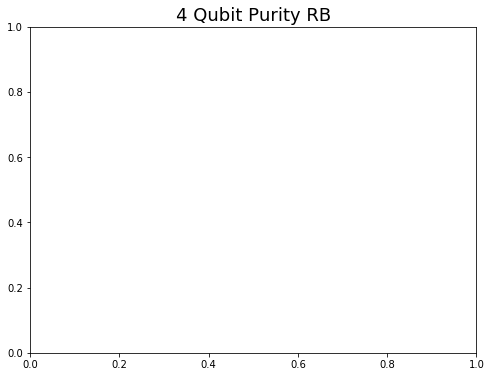

In [10]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)

# Plot the essence by calling plot_rb_data
rbfit_purity.plot_rb_data(0, ax=ax, add_label=True, show_plt=False)
    
# Add title and label
ax.set_title('%d Qubit Purity RB'%(nQ), fontsize=18)

plt.show()

## Define a coherent noise model

We define a coherent noise model for the simulator. 

In [22]:
err_unitary = np.zeros([2, 2], dtype=complex)
angle_err = 0.1
for i in range(2):
    err_unitary[i, i] = np.cos(angle_err)
    err_unitary[i, (i+1) % 2] = np.sin(angle_err)
err_unitary[0, 1] *= -1.0

error = coherent_unitary_error(err_unitary)
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error, 'u3')

In [23]:
#Execute purity RB circuits 
backend = qiskit.Aer.get_backend('qasm_simulator')
basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
coherent_purity_result_list = []
import time
for rb_seed in range(len(rb_purity_circs)):
    for d in range(npurity):
        print('Executing seed %d purity %d length %d'%(rb_seed, d, len(nCliffs)))
        new_circ = rb_purity_circs[rb_seed][d]
        job = qiskit.execute(new_circ, backend=backend, noise_model=noise_model, basis_gates=['u1','u2','u3','cx'])
        coherent_purity_result_list.append(job.result())
print("Finished Simulating Purity RB Circuits")

Executing seed 0 purity 0 length 10
Executing seed 0 purity 1 length 10
Executing seed 0 purity 2 length 10
Executing seed 0 purity 3 length 10
Executing seed 0 purity 4 length 10
Executing seed 0 purity 5 length 10
Executing seed 0 purity 6 length 10
Executing seed 0 purity 7 length 10
Executing seed 0 purity 8 length 10
Executing seed 1 purity 0 length 10
Executing seed 1 purity 1 length 10
Executing seed 1 purity 2 length 10
Executing seed 1 purity 3 length 10
Executing seed 1 purity 4 length 10
Executing seed 1 purity 5 length 10
Executing seed 1 purity 6 length 10
Executing seed 1 purity 7 length 10
Executing seed 1 purity 8 length 10
Executing seed 2 purity 0 length 10
Executing seed 2 purity 1 length 10
Executing seed 2 purity 2 length 10
Executing seed 2 purity 3 length 10
Executing seed 2 purity 4 length 10
Executing seed 2 purity 5 length 10
Executing seed 2 purity 6 length 10
Executing seed 2 purity 7 length 10
Executing seed 2 purity 8 length 10
Finished Simulating Purity R

In [24]:
rbfit_purity = rb.PurityRBFitter(coherent_purity_result_list, npurity, xdata, rb_opts['rb_pattern'])

1.5758641560872395
1.3263429005940757
1.4300689697265625
1.1358884175618489
1.0079530080159507
0.82489013671875
0.822360356648763
0.8364410400390625
0.6315205891927084
0.5661729176839192
0.3058045705159505
0.333072026570638
0.3756402333577474
0.49265480041503906
0.6744289398193359
0.8091386159261069
0.49257787068684894
0.8158753712972006
0.691491444905599
0.9872086842854819
0.35681851704915357
0.4688351949055989
0.6874039967854817
0.9253215789794922
1.5689481099446614
1.273154576619466
1.245992660522461
0.7564004262288413
0.9209156036376953
0.7542527516682943
1.7800935109456382
1.12065060933431
1.3536853790283203
1.0588569641113281
0.7220471700032554
0.7549858093261719
0.6917648315429688
0.9171307881673179
1.0321502685546875
0.6351598103841145
0.31154441833496094
0.5267963409423828
0.5821736653645834
0.5971043904622395
0.8340199788411459
1.1649278004964194
1.367898941040039
1.0315850575764975
1.0483875274658203
1.1075642903645833
0.3135089874267578
0.4507312774658203
0.6277351379394531

Print the fit result (seperately for each pattern)

In [25]:
print (rbfit_purity.fit)

[{'params': array([ 1.99999992,  0.99953306, -1.06937782]), 'params_err': array([1.03517101e+02, 2.54058716e-02, 1.03626813e+02])}, {'params': array([-0.69487674,  0.99485554,  1.28450544]), 'params_err': array([1.30449512, 0.01821542, 1.47581332])}]


For comparison, we also print the standard RB fit results

In [26]:
standard_result_list = []
count = 0
for rb_seed in range(len(rb_purity_circs)):
    for d in range(npurity):
        if d==0:
            standard_result_list.append(purity_result_list[count])
        count += 1

In [27]:
rbfit_standard = rb.RBFitter(standard_result_list, xdata, rb_opts['rb_pattern'])

In [28]:
print (rbfit_standard.fit)

[{'params': array([0.73316604, 0.97761587, 0.24150149]), 'params_err': array([0.01236992, 0.00093798, 0.00615229]), 'epc': 0.016788098172319743, 'epc_err': 1.6107448959748844e-05}, {'params': array([0.73712499, 0.97660911, 0.24984913]), 'params_err': array([0.00562073, 0.00057076, 0.00322314]), 'epc': 0.017543167757391648, 'epc_err': 1.0252774673740853e-05}]
